<center><h1> PREDICTIVE ANALYSIS ON HOSPITAL READMISSION</h1></center>

In [1]:
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"Book1.csv")
data.head()

,patient_nbr,gender,Age,LAMA,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_diagnoses,Fasting sugar,HbA1c,metformin,insulin,change,diabetesMed,readmitted
0,2518758,Female,49,No,2,10,1,0,4,None,None,No,No,No,Yes,NO
1,707769,Female,67,No,4,5,4,1,4,None,None,No,No,No,No,NO
2,36163476,Male,54,No,1,1,6,1,4,None,None,Steady,Steady,Ch,Yes,NO
3,1918116,Male,56,No,4,1,6,1,6,None,Norm,No,No,No,Yes,<30
4,842301,Female,49,No,6,1,4,1,5,None,None,No,No,No,No,<30


In [3]:
df = data.copy(deep=True)

In [4]:
df

,patient_nbr,gender,Age,LAMA,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_diagnoses,Fasting sugar,HbA1c,metformin,insulin,change,diabetesMed,readmitted
0,2518758,Female,49,No,2,10,1,0,4,None,None,No,No,No,Yes,NO
1,707769,Female,67,No,4,5,4,1,4,None,None,No,No,No,No,NO
2,36163476,Male,54,No,1,1,6,1,4,None,None,Steady,Steady,Ch,Yes,NO
3,1918116,Male,56,No,4,1,6,1,6,None,Norm,No,No,No,Yes,<30
4,842301,Female,49,No,6,1,4,1,5,None,None,No,No,No,No,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,109758042,Male,60,No,1,4,7,0,2,None,Norm,No,No,No,Yes,NO
881,160131992,Male,44,No,3,1,6,0,5,None,None,No,Steady,No,Yes,NO
882,97003080,Male,46,No,4,5,5,0,3,None,None,No,Up,Ch,Yes,NO
883,186544184,Female,33,No,4,10,5,0,9,None,None,No,Steady,No,Yes,NO


In [5]:
data.shape

(885, 16)

In [6]:
#checking the number of features in the Dataset
print("Number of features in the dataset :\n",'-'*40)
print(len(data.columns)) 

Number of features in the dataset :
 ----------------------------------------
16


In [7]:
#checking the features in the Datasets
print("Features in the datasets :\n",'-' * 40)
print(list(data.columns))

Features in the datasets :
 ----------------------------------------
['patient_nbr', 'gender', 'Age', 'LAMA', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses', 'Fasting sugar', 'HbA1c', 'metformin', 'insulin', 'change', 'diabetesMed', 'readmitted']


In [8]:
#checking the number of rows
print("Number of observations in the datasets :\n",'-' * 40)
print(len(data))

Number of observations in the datasets :
 ----------------------------------------
885


In [9]:
#checking the data types of features
print("Datatypes of features in the datasets :\n",'-' * 40)
print(data.dtypes)

Datatypes of features in the datasets :
 ----------------------------------------
patient_nbr            int64
gender                object
Age                    int64
LAMA                  object
time_in_hospital       int64
num_lab_procedures     int64
num_medications        int64
number_inpatient       int64
number_diagnoses       int64
Fasting sugar         object
HbA1c                 object
metformin             object
insulin               object
change                object
diabetesMed           object
readmitted            object
dtype: object


In [10]:
#checking for the nunber of null values in the dataset
data.isnull().sum()

patient_nbr           0
gender                0
Age                   0
LAMA                  0
time_in_hospital      0
num_lab_procedures    0
num_medications       0
number_inpatient      0
number_diagnoses      0
Fasting sugar         0
HbA1c                 0
metformin             0
insulin               0
change                0
diabetesMed           0
readmitted            0
dtype: int64

So, there are no null values in the dataset

In [11]:
#checking for the unique values in each features
data.nunique()

patient_nbr           877
gender                  2
Age                    68
LAMA                    2
time_in_hospital       13
num_lab_procedures     11
num_medications         7
number_inpatient       12
number_diagnoses       10
Fasting sugar           4
HbA1c                   4
metformin               4
insulin                 4
change                  2
diabetesMed             2
readmitted              2
dtype: int64

Features like Gender, LAMA, change & diabetesMed have only 2 unique values throughtout the dataset

In [12]:
data['gender'].value_counts()

Male      468
Female    417
Name: gender, dtype: int64

In [13]:
data['LAMA'].value_counts()

No     870
Yes     15
Name: LAMA, dtype: int64

In [14]:
data['change'].value_counts()

No    648
Ch    237
Name: change, dtype: int64

In [15]:
data['diabetesMed'].value_counts()

Yes    558
No     327
Name: diabetesMed, dtype: int64

These values are of the string type either YES/NO or other 2 unique values

To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. For example, we encode the “medicationchange” feature from “No” (no change) and “Ch” (changed) into 0 and 1.

In [16]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)


df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)


df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)


df['LAMA'] = df['LAMA'].replace('Yes', 1)
df['LAMA'] = df['LAMA'].replace('No', 0)

Here,

The values of 'change' 

In [17]:
df

,patient_nbr,gender,Age,LAMA,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_diagnoses,Fasting sugar,HbA1c,metformin,insulin,change,diabetesMed,readmitted
0,2518758,0,49,0,2,10,1,0,4,None,None,No,No,0,1,NO
1,707769,0,67,0,4,5,4,1,4,None,None,No,No,0,0,NO
2,36163476,1,54,0,1,1,6,1,4,None,None,Steady,Steady,1,1,NO
3,1918116,1,56,0,4,1,6,1,6,None,Norm,No,No,0,1,<30
4,842301,0,49,0,6,1,4,1,5,None,None,No,No,0,0,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,109758042,1,60,0,1,4,7,0,2,None,Norm,No,No,0,1,NO
881,160131992,1,44,0,3,1,6,0,5,None,None,No,Steady,0,1,NO
882,97003080,1,46,0,4,5,5,0,3,None,None,No,Up,1,1,NO
883,186544184,0,33,0,4,10,5,0,9,None,None,No,Steady,0,1,NO


Similarly the features of Fasting sugar, HbA1c, metaformin and Insulin can be interpret to numerical values

Let's first look into how the unique values are distributed for the above values to gain insights of converting them numerical values

# 1. Creating Dummies

In [18]:
dum_df = pd.get_dummies(df, columns=['Fasting sugar','HbA1c'])
dum_df

,patient_nbr,gender,Age,LAMA,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_diagnoses,metformin,...,diabetesMed,readmitted,Fasting sugar_>200,Fasting sugar_>300,Fasting sugar_None,Fasting sugar_Norm,HbA1c_>7,HbA1c_>8,HbA1c_None,HbA1c_Norm
0,2518758,0,49,0,2,10,1,0,4,No,...,1,NO,0,0,1,0,0,0,1,0
1,707769,0,67,0,4,5,4,1,4,No,...,0,NO,0,0,1,0,0,0,1,0
2,36163476,1,54,0,1,1,6,1,4,Steady,...,1,NO,0,0,1,0,0,0,1,0
3,1918116,1,56,0,4,1,6,1,6,No,...,1,<30,0,0,1,0,0,0,0,1
4,842301,0,49,0,6,1,4,1,5,No,...,0,<30,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,109758042,1,60,0,1,4,7,0,2,No,...,1,NO,0,0,1,0,0,0,0,1
881,160131992,1,44,0,3,1,6,0,5,No,...,1,NO,0,0,1,0,0,0,1,0
882,97003080,1,46,0,4,5,5,0,3,No,...,1,NO,0,0,1,0,0,0,1,0
883,186544184,0,33,0,4,10,5,0,9,No,...,1,NO,0,0,1,0,0,0,1,0


In [19]:
dum_df= pd.get_dummies(df,columns=['metformin','insulin'])
dum_df

,patient_nbr,gender,Age,LAMA,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_diagnoses,Fasting sugar,...,diabetesMed,readmitted,metformin_Down,metformin_No,metformin_Steady,metformin_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,2518758,0,49,0,2,10,1,0,4,None,...,1,NO,0,1,0,0,0,1,0,0
1,707769,0,67,0,4,5,4,1,4,None,...,0,NO,0,1,0,0,0,1,0,0
2,36163476,1,54,0,1,1,6,1,4,None,...,1,NO,0,0,1,0,0,0,1,0
3,1918116,1,56,0,4,1,6,1,6,None,...,1,<30,0,1,0,0,0,1,0,0
4,842301,0,49,0,6,1,4,1,5,None,...,0,<30,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,109758042,1,60,0,1,4,7,0,2,None,...,1,NO,0,1,0,0,0,1,0,0
881,160131992,1,44,0,3,1,6,0,5,None,...,1,NO,0,1,0,0,0,0,1,0
882,97003080,1,46,0,4,5,5,0,3,None,...,1,NO,0,1,0,0,0,0,0,1
883,186544184,0,33,0,4,10,5,0,9,None,...,1,NO,0,1,0,0,0,0,1,0


In [20]:
del dum_df['Fasting sugar']

In [21]:
del dum_df['HbA1c']

In [22]:
dum_df

,patient_nbr,gender,Age,LAMA,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,metformin_Down,metformin_No,metformin_Steady,metformin_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,2518758,0,49,0,2,10,1,0,4,0,1,NO,0,1,0,0,0,1,0,0
1,707769,0,67,0,4,5,4,1,4,0,0,NO,0,1,0,0,0,1,0,0
2,36163476,1,54,0,1,1,6,1,4,1,1,NO,0,0,1,0,0,0,1,0
3,1918116,1,56,0,4,1,6,1,6,0,1,<30,0,1,0,0,0,1,0,0
4,842301,0,49,0,6,1,4,1,5,0,0,<30,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,109758042,1,60,0,1,4,7,0,2,0,1,NO,0,1,0,0,0,1,0,0
881,160131992,1,44,0,3,1,6,0,5,0,1,NO,0,1,0,0,0,0,1,0
882,97003080,1,46,0,4,5,5,0,3,1,1,NO,0,1,0,0,0,0,0,1
883,186544184,0,33,0,4,10,5,0,9,0,1,NO,0,1,0,0,0,0,1,0


In [23]:
#dum_df['metformin']

## 2. Substitution:

Like Label encoding

In [24]:
data['HbA1c'].nunique()

4

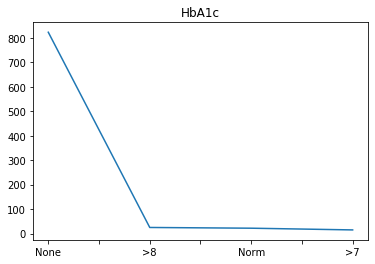

In [25]:
plt.title('HbA1c')
df['HbA1c'].value_counts().plot()

Here, None can be assigned -99 (as it comprises of majority #and cannot be dropped)<br>
      Norm can be assigned 0 <br>
      >7,>8 can be assigned 1

In [26]:
df['HbA1c'] = df['HbA1c'].replace('>7', 1)
df['HbA1c'] = df['HbA1c'].replace('>8', 1)
df['HbA1c'] = df['HbA1c'].replace('Norm', 0)
df['HbA1c'] = df['HbA1c'].replace('None', -99)

In [27]:
df['Fasting sugar'].nunique()

4

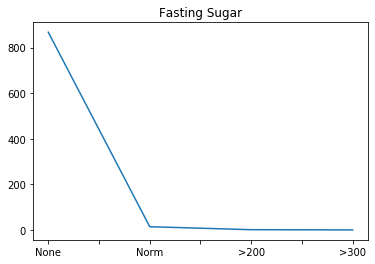

In [28]:
plt.title('Fasting Sugar')
df['Fasting sugar'].value_counts().plot()

In [29]:
df["Fasting sugar"] = df["Fasting sugar"].replace('>200', 1)
df["Fasting sugar"] = df["Fasting sugar"].replace('>300', 1)
df["Fasting sugar"] = df["Fasting sugar"].replace('Norm', 0)
df["Fasting sugar"] = df["Fasting sugar"].replace('None', -99)

In [30]:
df

,patient_nbr,gender,Age,LAMA,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_diagnoses,Fasting sugar,HbA1c,metformin,insulin,change,diabetesMed,readmitted
0,2518758,0,49,0,2,10,1,0,4,-99,-99,No,No,0,1,NO
1,707769,0,67,0,4,5,4,1,4,-99,-99,No,No,0,0,NO
2,36163476,1,54,0,1,1,6,1,4,-99,-99,Steady,Steady,1,1,NO
3,1918116,1,56,0,4,1,6,1,6,-99,0,No,No,0,1,<30
4,842301,0,49,0,6,1,4,1,5,-99,-99,No,No,0,0,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,109758042,1,60,0,1,4,7,0,2,-99,0,No,No,0,1,NO
881,160131992,1,44,0,3,1,6,0,5,-99,-99,No,Steady,0,1,NO
882,97003080,1,46,0,4,5,5,0,3,-99,-99,No,Up,1,1,NO
883,186544184,0,33,0,4,10,5,0,9,-99,-99,No,Steady,0,1,NO


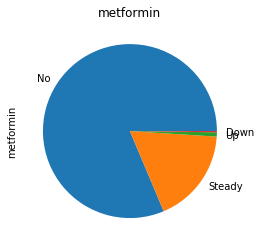

In [31]:
plt.title('metformin')
df['metformin'].value_counts().plot.pie()

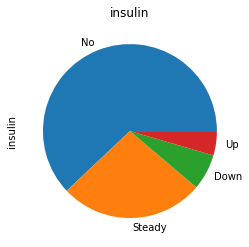

In [32]:
plt.title('insulin')
df['insulin'].value_counts().plot.pie()

In [33]:
keys= ['metformin', 'insulin']
for col in keys:
 df[col] = df[col].replace('No', 0)
 df[col] = df[col].replace('Steady', 1)
 df[col] = df[col].replace('Up', 1)
 df[col] = df[col].replace('Down', 1)

In [34]:
df

,patient_nbr,gender,Age,LAMA,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_diagnoses,Fasting sugar,HbA1c,metformin,insulin,change,diabetesMed,readmitted
0,2518758,0,49,0,2,10,1,0,4,-99,-99,0,0,0,1,NO
1,707769,0,67,0,4,5,4,1,4,-99,-99,0,0,0,0,NO
2,36163476,1,54,0,1,1,6,1,4,-99,-99,1,1,1,1,NO
3,1918116,1,56,0,4,1,6,1,6,-99,0,0,0,0,1,<30
4,842301,0,49,0,6,1,4,1,5,-99,-99,0,0,0,0,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,109758042,1,60,0,1,4,7,0,2,-99,0,0,0,0,1,NO
881,160131992,1,44,0,3,1,6,0,5,-99,-99,0,1,0,1,NO
882,97003080,1,46,0,4,5,5,0,3,-99,-99,0,1,1,1,NO
883,186544184,0,33,0,4,10,5,0,9,-99,-99,0,1,0,1,NO


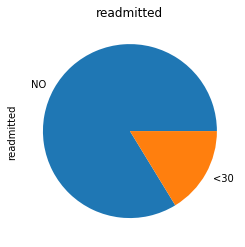

In [35]:
plt.title('readmitted')
df['readmitted'].value_counts().plot.pie()

In [36]:
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)


In [37]:
df

,patient_nbr,gender,Age,LAMA,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_diagnoses,Fasting sugar,HbA1c,metformin,insulin,change,diabetesMed,readmitted
0,2518758,0,49,0,2,10,1,0,4,-99,-99,0,0,0,1,0
1,707769,0,67,0,4,5,4,1,4,-99,-99,0,0,0,0,0
2,36163476,1,54,0,1,1,6,1,4,-99,-99,1,1,1,1,0
3,1918116,1,56,0,4,1,6,1,6,-99,0,0,0,0,1,1
4,842301,0,49,0,6,1,4,1,5,-99,-99,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,109758042,1,60,0,1,4,7,0,2,-99,0,0,0,0,1,0
881,160131992,1,44,0,3,1,6,0,5,-99,-99,0,1,0,1,0
882,97003080,1,46,0,4,5,5,0,3,-99,-99,0,1,1,1,0
883,186544184,0,33,0,4,10,5,0,9,-99,-99,0,1,0,1,0


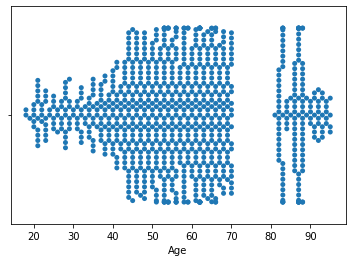

In [38]:
sns.swarmplot(x='Age',data=data)

In [39]:
df1=df.copy(deep=True)

In [40]:
dum_df['readmitted'] = dum_df['readmitted'].replace('<30', 1)
dum_df['readmitted'] = dum_df['readmitted'].replace('NO', 0)

### Dropping the patient number,

In [41]:
dum_df=dum_df.drop(columns='patient_nbr')

In [42]:
df=df.drop(columns='patient_nbr')

# Method 1(Substitution)

In [43]:
xc=df.drop(columns='readmitted')

In [44]:
yc=df.readmitted

In [45]:
from sklearn.model_selection import train_test_split
xc_train,xc_test,yc_train,yc_test = train_test_split(xc,yc,test_size = 0.2,random_state=42)

In [46]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counterb=Counter(yc_train)
#print("Before",counterb)
print('Original dataset shape {}'.format(Counter(yc_train)))
#oversampling the train dataset using SMOTE
smt = SMOTE()

xc_train_sm, yc_train_sm = smt.fit_sample(xc_train, yc_train)

countera = Counter(yc_train_sm)
#print("After",countera)
print('New dataset shape {}'.format(Counter(yc_train_sm)))


Original dataset shape Counter({0: 589, 1: 119})
New dataset shape Counter({0: 589, 1: 589})


In [47]:
X_train,X_test,y_train,y_test = train_test_split(xc_train_sm,yc_train_sm,test_size = 0.2,random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 50, max_depth=25, criterion = "gini",
min_samples_split=10)


forrest.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=50)

In [49]:
y_test_predict = forrest.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, y_test_predict)))

Accuracy is 0.87
Precision is 0.87
Recall is 0.86
AUC is 0.87


# Method 2(dummies)

In [51]:
x1=dum_df.drop(columns='readmitted')

In [52]:
y1=dum_df.readmitted

In [53]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.2,random_state=42)

In [54]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counterb=Counter(yc_train)
#print("Before",counterb)
print('Original dataset shape {}'.format(Counter(y1_train)))
#oversampling the train dataset using SMOTE
smt = SMOTE()

x1_train_sm, y1_train_sm = smt.fit_sample(x1_train, y1_train)

countera = Counter(y1_train_sm)
#print("After",countera)
print('New dataset shape {}'.format(Counter(y1_train_sm)))


Original dataset shape Counter({0: 589, 1: 119})
New dataset shape Counter({0: 589, 1: 589})


In [55]:
X1_train,X1_test,y1_train,y1_test = train_test_split(x1_train_sm,y1_train_sm,test_size = 0.2,random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 50, max_depth=25, criterion = "gini",
min_samples_split=10)


forrest.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=50)

In [57]:
y1_test_predict = forrest.predict(X1_test)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

print("Accuracy is {0:.2f}".format(accuracy_score(y1_test, y1_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y1_test, y1_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y1_test, y1_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y1_test, y1_test_predict)))

Accuracy is 0.92
Precision is 0.96
Recall is 0.88
AUC is 0.92


1:

# 1:

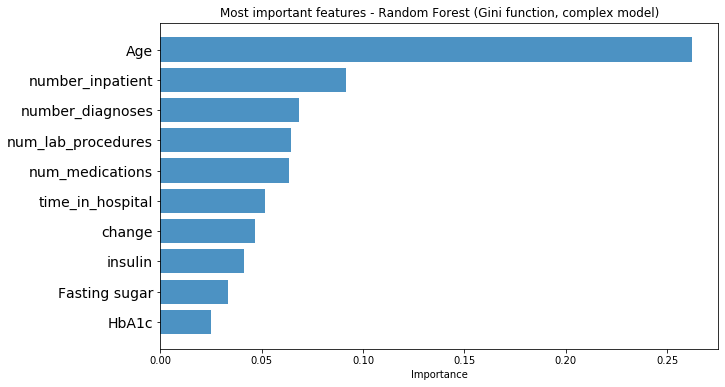

In [59]:
feature_names = X_train.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)],
columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center',
alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest (Gini function, complex model)')
plt.show()

# 2.

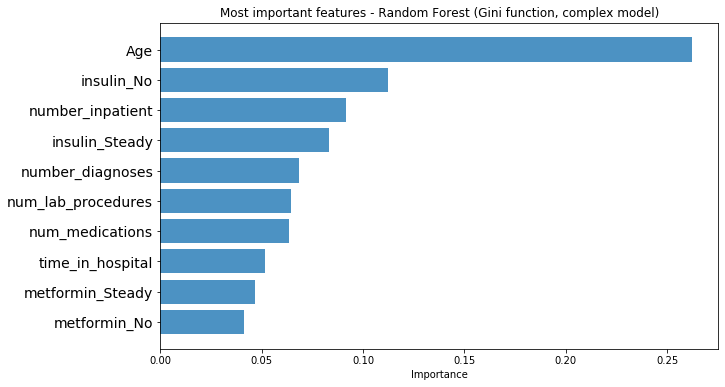

In [60]:
feature_names = X1_train.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)],
columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center',
alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest (Gini function, complex model)')
plt.show()

------------------------------------------------------------------------------------------------x-----------------------------------------------------------------------------------------------------------------


data.loc[]

from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

print("Before OverSampling, counts of label '1': {}".format(sum(yc_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(yc_train == 0))) 

####### import SMOTE module from imblearn library 
######## pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
xc_train_res, yc_train_res = sm.fit_sample(xc_train, yc_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(xc_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(yc_train_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(yc_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(yc_train_res == 0))) 

In [61]:
#from sklearn.ensemble import RandomForestRegressor

In [62]:
#rf1 = RandomForestRegressor(n_estimators = 20, random_state = 0)

In [63]:
#rf2 = RandomForestRegressor(n_estimators = 20, random_state = 0)

def custom_excepthook(type, value, traceback):
    if type is KeyboardInterrupt:
        return # do nothing
    else:
        sys.__excepthook__(type, value, traceback)
rf1.fit(xc_train, yc_train)

def custom_excepthook(type, value, traceback):
    if type is KeyboardInterrupt:
        return # do nothing
    else:
        sys.__excepthook__(type, value, traceback)
rf2.fit(x_train, y_train)

import statsmodels.api as sm
predrf1=rf1.predict(xc_test)
reg_ols1=sm.OLS(endog=yc_train,exog=xc_train).fit()

import statsmodels.api as sm
predrf2=rf2.predict(x_test)
reg_ols2=sm.OLS(endog=y_train,exog=x_train).fit()

In [64]:
#from sklearn.metrics import mean_squared_error
#mport math

In [65]:
#mse1=mean_squared_error(yc_test,predrf1)
#rmse1=math.sqrt(mse1)
#print('RMSE is:',rmse1)

In [66]:
#mse2=mean_squared_error(y_test,predrf2)
##print('RMSE is:',rmse2)

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(yc_test, predrf1)))
print("Precision is {0:.2f}".format(precision_score(yc_test, predrf1)))
print("Recall is {0:.2f}".format(recall_score(yc_test, predrf1)))
print("AUC is {0:.2f}".format(roc_auc_score(yc_test, predrf1)))

print(f'Model Accuracy: {rf1.score(yc_test, yc_train)}')

In [67]:
#print(f'Model Accuracy: {rf2.score(x_test, predrf2)}')

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(yc_test,predrf1))
print(classification_report(yc_test,predrf1))
print(accuracy_score(yc_test, predrf1))

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(yc_test, predrf1))
print('Mean Squared Error:', metrics.mean_squared_error(yc_test, predrf1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yc_test, predrf1)))

from sklearn.metrics import accuracy_score

accuracy_score(yc_test, predrf1)